# 개요

- 성과가 잘 나오는 기존 모델을 가져온다
- 이미 훈련된 파라미터(W, b)등을 초기화 한다
- 현재 남아 있는 것은 모델을 구성한 layer만 남아 있을것이다
- 새로운 데이터를 넣어서 훈련
- 성과를 확인
  - **가중치는 사용하지 않겟다. 내가 직접 훈련시켜서 만든다**

In [1]:
import tensorflow as tf
tf.__version__

'2.6.0'

# 데이터 준비

In [2]:
# 캐글에서 경쟁 부분에서 제공된 이미지를 사용
# 해당 이미자가 캐글에서 제외되서 별도로 제공

# 훈련 데이터의 실제 정딥
tf.keras.utils.get_file('/content/labels.csv', 'http://bit.ly/2GDxsYS')
# 경쟁시 제출하는 답안 양식
tf.keras.utils.get_file('/content/sample_submission.csv', 'http://bit.ly/2GGnMNd')
# 훈련 데이터 
tf.keras.utils.get_file('/content/train.zip', 'http://bit.ly/31nIyel')
# 테스트 데이터
tf.keras.utils.get_file('/content/test.zip', 'http://bit.ly/2GHEsnO')

362856448/362841195 [==============================] - 6s 0us/step


'/content/test.zip'

In [3]:
# 압축 해제(리눅스 명령, 파이썬의 압축 패키지를 이용하여 처리가능)
!unzip train.zip
!unzip test.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: test/82ddade069436304c8b98fe2b3c4f5ec.jpg  
  inflating: test/82e41a906dbd9ec362a3d49cf6bbe645.jpg  
  inflating: test/82e5e34cc18b267ef7057cc92de8b44b.jpg  
  inflating: test/82e64f28df4fff22beb11e9a1e413212.jpg  
  inflating: test/82ec6bdf968a14923340179515ce5546.jpg  
  inflating: test/82ee3ee4dc01b33203a049c6c3338034.jpg  
  inflating: test/82f07a63a1f03ff9d8e0f4a8458caa93.jpg  
  inflating: test/82f5fb0bdaff30a4a3374e2d9915856c.jpg  
  inflating: test/82fbff1bd375474e3d4ec5cbfde3f9f0.jpg  
  inflating: test/8301c772feb7f4068473f0157ae58f9b.jpg  
  inflating: test/8307be57a9d76c1584e16801a39cb1dc.jpg  
  inflating: test/831a38bd2cfa0a093967d5b6c1ac09dc.jpg  
  inflating: test/831ef824af939f9754e3593638933b64.jpg  
  inflating: test/8322f53b29325419ef3bcf7cf10d7172.jpg  
  inflating: test/83233e2774e116ef34a04c53dd00a282.jpg  
  inflating: test/832cae23410e741ecd2014b3818ed7c4.jpg  
  inflating: test/833f90a3652b06607b55bd25c8d97457.j

- 캐글에서 차후하도 데이터 사용하는 방법
- !pip install kaggle

```
import os

# 이름, 인증키, 캐글에 가입후 발급
os.environ['KAGGLE_USERNAME'] = '이름'
os.environ['KAGGLE_KEY'] = '인증키'
```

- !kaggle competitions download -c 경쟁부분이름



# 데이터 확인

## 정답 레이블 확인

In [4]:
import pandas as pd

In [5]:
label_text = pd.read_csv('/content/labels.csv')
label_text.shape

(10222, 2)

In [6]:
label_text.head()
# id:사진파일이름, breed : 견종

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [7]:
label_text.info()
# 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


In [8]:
# 견종의 종류
len( label_text['breed'].unique() )

120

In [9]:
# 중복되지 않는 가지수 => 클레스개수 => 정답의 개수
label_text['breed'].nunique()

120

## 훈련 데이터 확인

In [10]:
# 이미지 확인
import PIL.Image as Image
import matplotlib.pyplot as plt


000bec180eb18c7604dcecc8fe0dba07
001513dfcb2ffafc82cccf4d8bbaba97
001cdf01b096e06d78e9e5112d419397
00214f311d5d2247d5dfe4fe24b2303d


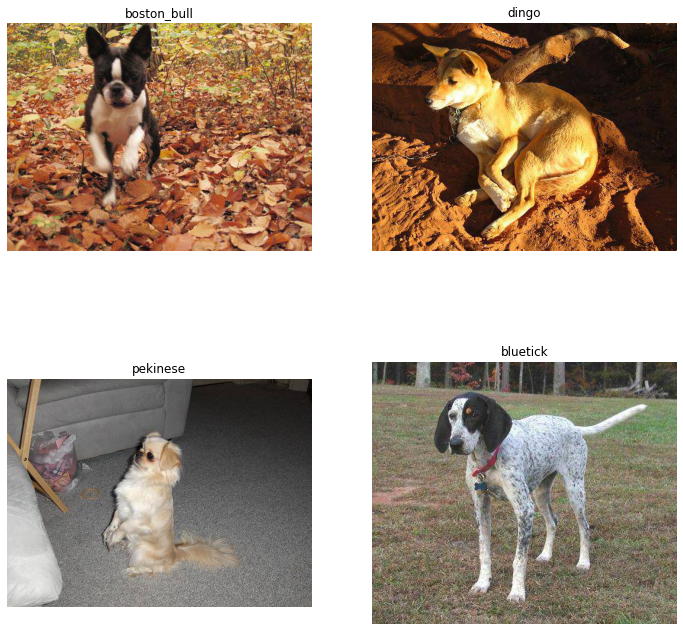

In [11]:
# 이미지 보이기
plt.figure( figsize=(12,12) )

# 플로팅
for i in range(4):
  # 이미지 데이터 획득
  image_id = label_text.loc[ i, 'id' ]
  plt.subplot( 2, 2, i+1 )
  print( image_id )
  # 이미지 그리기
  tmp = plt.imread( f'/content/train/{image_id}.jpg' )
  plt.imshow(tmp)
  # 순번, 견종이름 표시
  plt.axis('off') #좌표축 생략
  plt.title(label_text.loc[ i, 'breed' ])
  pass

# show
plt.show()

# 실생활에서 사용할 데이터들은 날것이면서, 규격도 제각각, 앵글, 각도 제각각일 것이다
# 이런 데이터에 대한 전처리 혹은 신경망에서 처리 과정에서 뭔가 처리가 있어야 정확도를 높일것이다

# 전이학습 진행

## 사전 학습된 모델 획득

In [12]:
from tensorflow.keras.applications import MobileNetV2
mobilev2 = MobileNetV2()

14548992/14536120 [==============================] - 0s 0us/step


In [13]:
import numpy as np

## 가중치, 편향 초기화

In [14]:
# 전체 층수
len( mobilev2.layers )
# 156층

156

### 훈련 가능한 형태로 layer  조정

In [15]:
# 맨 마지막 층 제외하고 나머지 파라미터들을 초기화 1
# 훈련 가능한 형태로 layer를 조정
for layer in mobilev2.layers[:-1]:
  # 이 층은 학습을 진행하겟다 -> 기존것을 사용하지 않고, 학습을 통해 얻어진 값을 세팅
  # 전이학습의 기본 모형에서 가장 전이학습이라고 말하기 약한 정도 수준(layer만 활용)
  layer.trainable = True
  pass

### 가중치 혹은 바이어스 초기화

- 새롭게 가중치값을 랜덤(0,1)하게 세팅했다->학습전 pure한 단계
- 향후 학습을 통해서 가중치는 미세 조정된다

In [16]:
# 가중치 값을 가진 커널을 대상으로 처리 
# MobileNetV2는 편향을 사용 하지 않는 모델이다 bias가 없다
for layer in mobilev2.layers[:-1]:
  # 각층에 커널이 존재하는지 체크 -> W가 있는지 체크
  if 'kernel' in layer.__dict__:
    # 해당 층에 가중치가 존재하면  shape을 구한다
    kernel_shape = np.array( layer.get_weights() ).shape
    # 커널에 가중치값을 특정값으로 세팅하기 위해서
    # 평균 0, 표준편차 1인 random 하게 변수를 생성
    layer.set_weights( tf.random.normal( kernel_shape, 0, 1) )
  pass

## 훈련용 데이터의 전처리

- 이미지 크기가 제각각(고민)
  - 이미지 크기를 강제로 맞춘다
  - 이미지가 깨질수 있다 (감안?)
- 이미지 데이터가 정규화 않되어 있다(고민)

In [17]:
import cv2

In [18]:
mobilev2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [19]:
# 이미지 데이터는 통상 배치사이즈 만큼 읽어서 처리하는 방법
# 한번데 올려서 처리하는 방법
# 여기서는 한번에 올려서 가는데, 그 양을 줄이겟다 -> 1000개
# 전이학습 사용시 모델의 입력 shape은 따라가야 한다 -> 데이터도 같은 형태로의 가공이 필요
train_X = []
for i in range( 1000 ): # label_text[:1000]) ):
  # 이미지 읽기
  fName = label_text['id'][i]
  img = cv2.imread(f'/content/train/{ fName }.jpg')
  # 이미지 리사이즈 (224, 224) : 화면 비율 무시 => 성능은 않좋을 것이다 감안
  # MobileNetV2의 입력 층의 shape이 (?, 224, 224, 3)
  img = cv2.resize(img, dsize=(224, 224))
  # 정규화 => 채널이 3이던 1이던 관계없이 각 색상 성분을 모두다 255로 나눠서 정규화처리
  # 데이터는 부동소수화 되었다
  img = img / 255.0
  # 훈련 데이터에 추가 혹은 파일로 혹은 array로 저장해 놓고 사용한다
  train_X.append( img )

# 최종 훈련 데이터
train_X = np.array( train_X )
print( train_X.shape )
#print( train_X.size * train_X.)
# NHWC 형태로 준비가 되었다

(1000, 224, 224, 3)


In [20]:
# 용량 (bytes)
train_X.size * train_X.itemsize

1204224000

## 훈련용 정답의 대한 전처리

- 파일명, 종
- 딥러닝 수치화 되어야 한다

In [21]:
# 정답을 구성하는 값만 추출
uni_Y   = label_text['breed'].unique().tolist()
print( uni_Y )
# one-hot 인코딩 처리 or 해당 문자열의 위치값 이용
train_Y = [ uni_Y.index( name )  for name in label_text['breed'] ]
print( train_Y[:10])
train_Y = np.array( train_Y )
train_Y[:10], train_Y[-10:]

['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever', 'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound', 'shetland_sheepdog', 'walker_hound', 'maltese_dog', 'norfolk_terrier', 'african_hunting_dog', 'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer', 'doberman', 'otterhound', 'standard_schnauzer', 'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn', 'affenpinscher', 'labrador_retriever', 'ibizan_hound', 'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael', 'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier', 'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz', 'german_shepherd', 'greater_swiss_mountain_dog', 'basset', 'australian_terrier', 'schipperke', 'rhodesian_ridgeback', 'irish_setter', 'appenzeller', 'bloodhound', 'samoyed', 'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon', 'border_collie', 'entlebucher', 'collie', 'malamute', 'welsh_springer_spaniel', 'chihuahua', 'saluki', 'pug', 'malino

(array([0, 1, 2, 3, 4, 5, 5, 6, 7, 8]),
 array([34, 87, 91, 63, 48,  6, 93, 63, 77, 92]))

In [22]:
uni_Y.index( 'golden_retriever' ), uni_Y.index( 'dingo' )

(4, 1)

## 모델을 새로 정의

- 전이학습용을 받은 모델 + 새로운 구조를 추가 (후반부 분류하는 파트만)
  - 기존 모델은 156층이다 
  - 각 층은 입력층을 제외하고, 특정 크기에서 많은 학습들이 반복적으로 진행된다( summary() 확인) 
  - 맨 마지막 2개 층에서 flattern  및 y에 수렴하는것을 확인할 수있엇다
  - 마지막 2개를 교체하여 최종 신경망 구성을 마무리 한다
- 학습
- 평가

In [26]:
# 뒤에서 1개 제거 -> 길을 변경, flow 변경
x           = mobilev2.layers[-2].output
# 최종 예측 분류되는 개수는 120개이다
predictions = tf.keras.layers.Dense( 120, activation='softmax')( x )
# 모델 획득 < 기존모델에서 새로운 출력층으로 나오는 모델을 생성한다
model       = tf.keras.Model( inputs=mobilev2.input, outputs=predictions )

In [27]:
# 평가도구, 최적화 추가
model.compile( optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

- 기존 모델에 마지막 레이아웃을 교체하여 처리

In [28]:
# GPU 로 학습 진행
with tf.device('/device:GPU:0'):
  hist = model.fit( train_X, train_Y, epochs=10, validation_split=0.25, batch_size=32 )

Epoch 1/10
24/24 [==============================] - 44s 488ms/step - loss: 5.0099 - accuracy: 0.0080 - val_loss: 11.3475 - val_accuracy: 0.0000e+00
Epoch 2/10
24/24 [==============================] - 9s 382ms/step - loss: 4.8725 - accuracy: 0.0080 - val_loss: 11.4112 - val_accuracy: 0.0080
Epoch 3/10
24/24 [==============================] - 9s 381ms/step - loss: 4.8327 - accuracy: 0.0067 - val_loss: 10.6664 - val_accuracy: 0.0000e+00
Epoch 4/10
24/24 [==============================] - 9s 381ms/step - loss: 4.7812 - accuracy: 0.0160 - val_loss: 10.2336 - val_accuracy: 0.0080
Epoch 5/10
24/24 [==============================] - 9s 379ms/step - loss: 4.7736 - accuracy: 0.0173 - val_loss: 11.9092 - val_accuracy: 0.0040
Epoch 6/10
24/24 [==============================] - 9s 380ms/step - loss: 4.7392 - accuracy: 0.0227 - val_loss: 10.8336 - val_accuracy: 0.0080
Epoch 7/10
24/24 [==============================] - 9s 382ms/step - loss: 4.7179 - accuracy: 0.0200 - val_loss: 11.0570 - val_accurac

- 결과 평가
  - Total params: 2,411,704
  - Trainable params: 2,377,592
  - Non-trainable params: 34,112
  - 정확도 : 2.27%
  - 손실 ; 4.6344
  - 총평 : 훈련 성과가 거의 없다. 가중치를 다 초기화하는 바람에(기존의 훈련 성과를 전혀 재사용 할수 없었다), 단지 구조만 재홣용하는 수준으로 진행되었는데, 성과가 처참하다

In [31]:
# hist 시각화 확인
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [32]:
# 에포크 개수 만큼 데이터가 쌓여있다
hist.history['loss']

[5.00994873046875,
 4.872541904449463,
 4.832709312438965,
 4.781215190887451,
 4.773568630218506,
 4.73919153213501,
 4.717905521392822,
 4.667503833770752,
 4.651699542999268,
 4.6344499588012695]

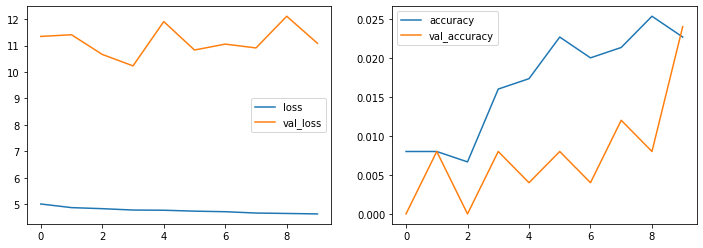

In [37]:
plt.figure(figsize=(12,4))

plt.subplot( 1, 2, 1)
plt.plot( hist.history['loss'], label='loss' )
plt.plot( hist.history['val_loss'], label='val_loss' )

plt.legend()

plt.subplot( 1, 2, 2)
plt.plot( hist.history['accuracy'], label='accuracy' )
plt.plot( hist.history['val_accuracy'] , label='val_accuracy')

plt.legend()

plt.show()
# 별 의미 없다 